In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
loan_data=pd.read_csv(r"C:\Users\ChethanM\Desktop\loan_train.csv")

In [3]:
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
loan_data.shape

(346, 10)

In [5]:
#Convert to date time object

loan_data["effective_date"]=pd.to_datetime(loan_data["effective_date"])
loan_data["due_date"]=pd.to_datetime(loan_data["due_date"])
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
#Data Visualization and pre processing

In [7]:
#Let’s see how many of each class is in our data set

loan_data["loan_status"].value_counts()

#260 people have paid off the loan on time while 86 have gone into collection

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

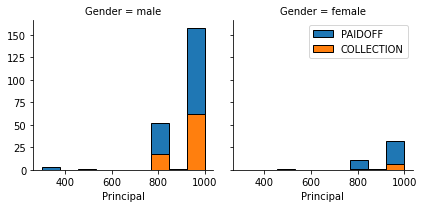

In [8]:
import seaborn as sns

bins=np.linspace(loan_data.Principal.min(),loan_data.Principal.max(),10)
g=sns.FacetGrid(loan_data,col="Gender",hue="loan_status",col_wrap=2)
g.map(plt.hist,"Principal",bins=bins,ec="k")

g.axes[-1].legend()
plt.show()

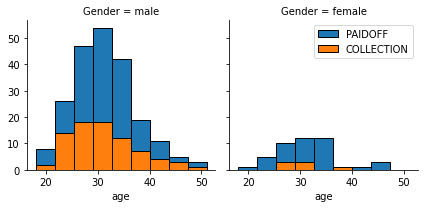

In [9]:
import seaborn as sns

bins=np.linspace(loan_data.age.min(),loan_data.age.max(),10)
g=sns.FacetGrid(loan_data,col="Gender",hue="loan_status",col_wrap=2)
g.map(plt.hist,"age",bins=bins,ec="k")

g.axes[-1].legend()
plt.show()

In [10]:
#Pre-processing: Feature selection/extraction
#Lets look at the day of the week people get the loan

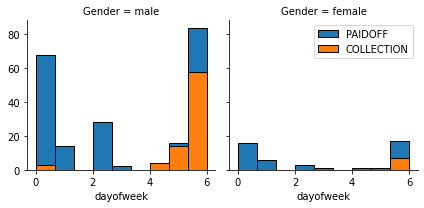

In [11]:
loan_data['dayofweek'] = loan_data['effective_date'].dt.dayofweek
bins = np.linspace(loan_data.dayofweek.min(), loan_data.dayofweek.max(), 10)
g = sns.FacetGrid(loan_data, col="Gender", hue="loan_status", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [12]:
loan_data["weekend"]=loan_data["dayofweek"].apply(lambda x:1 if(x>3) else 0)

In [13]:
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [14]:
#Convert Categorical features to numerical values

In [15]:
#Lets look at gender:

In [16]:
loan_data.groupby(["Gender"])["loan_status"].value_counts()

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64

In [17]:
loan_data["Gender"].replace(to_replace=["male","female"],value=[0,1],inplace=True)
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [18]:
#How about education?

In [19]:
loan_data.groupby(["education"])["loan_status"].value_counts()

education             loan_status
Bechalor              PAIDOFF         33
                      COLLECTION      11
High School or Below  PAIDOFF        112
                      COLLECTION      39
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               PAIDOFF        114
                      COLLECTION      35
Name: loan_status, dtype: int64

In [20]:
Feature = loan_data[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(loan_data['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [21]:
#Feature selection

In [22]:
X=Feature
X[:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [23]:
y=loan_data["loan_status"]
y[:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [24]:
#Normalize the data

In [25]:
from sklearn import preprocessing

In [26]:
x=preprocessing.StandardScaler().fit(X).transform(X)
x[:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [27]:
#Classification

#K Nearest Neighbor(KNN)
#Decision Tree
#Support Vector Machine
#Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3,stratify=y)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


In [29]:
#K Nearest Neighbor(KNN)

In [30]:
#You should find the best k to build the model with the best accuracy

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [32]:
for k in range(1,20):
    neighbor=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    y_hat=neighbor.predict(x_test)
    print("For K= ",k,"Accuracy=",metrics.accuracy_score(y_test,y_hat))

For K=  1 Accuracy= 0.6826923076923077
For K=  2 Accuracy= 0.6826923076923077
For K=  3 Accuracy= 0.7307692307692307
For K=  4 Accuracy= 0.75
For K=  5 Accuracy= 0.75
For K=  6 Accuracy= 0.7403846153846154
For K=  7 Accuracy= 0.7692307692307693
For K=  8 Accuracy= 0.75
For K=  9 Accuracy= 0.7788461538461539
For K=  10 Accuracy= 0.7692307692307693
For K=  11 Accuracy= 0.7884615384615384
For K=  12 Accuracy= 0.7788461538461539
For K=  13 Accuracy= 0.75
For K=  14 Accuracy= 0.75
For K=  15 Accuracy= 0.7692307692307693
For K=  16 Accuracy= 0.7596153846153846
For K=  17 Accuracy= 0.7692307692307693
For K=  18 Accuracy= 0.7596153846153846
For K=  19 Accuracy= 0.7692307692307693


In [33]:
print("We can see that the KNN model is the best for K=3")

We can see that the KNN model is the best for K=3


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [35]:
best_knn_model=KNeighborsClassifier(n_neighbors=12).fit(x_train,y_train)
best_knn_model

KNeighborsClassifier(n_neighbors=12)

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

              precision    recall  f1-score   support

  COLLECTION       0.75      0.12      0.20        26
     PAIDOFF       0.77      0.99      0.87        78

    accuracy                           0.77       104
   macro avg       0.76      0.55      0.53       104
weighted avg       0.77      0.77      0.70       104

Confusion matrix, without normalization
[[77  1]
 [23  3]]


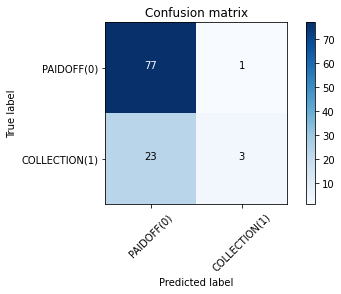

In [38]:
cnf_matrix = confusion_matrix(y_test,y_hat, labels=["PAIDOFF","COLLECTION"])
np.set_printoptions(precision=2)

print (classification_report(y_test,y_hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(0)','COLLECTION(1)'],normalize= False,  title='Confusion matrix')

In [39]:
## Evaluation Metrics
# jaccard score and f1 score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_knn_model.predict(x_train),pos_label="PAIDOFF"))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_knn_model.predict(x_test),pos_label="PAIDOFF"))

print("Train set Accuracy (F1): ", f1_score(y_train, best_knn_model.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_knn_model.predict(x_test), average='weighted'))

Train set Accuracy (Jaccard):  0.7433628318584071
Test set Accuracy (Jaccard):  0.7628865979381443
Train set Accuracy (F1):  0.7295101452923327
Test set Accuracy (F1):  0.7437174016121385


In [40]:
#

In [41]:
#

In [42]:
#

In [43]:
#Decision Tree

In [44]:
# importing libraries
from sklearn.tree import DecisionTreeClassifier

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3,stratify=y)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


In [46]:
for d in range(1,20):
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=d).fit(x_train,y_train)
    dt_yhat=dt.predict(x_test)
    print("For the depth:",d,"Accuracy score is:",metrics.accuracy_score(y_test,dt_yhat))

For the depth: 1 Accuracy score is: 0.75
For the depth: 2 Accuracy score is: 0.75
For the depth: 3 Accuracy score is: 0.7211538461538461
For the depth: 4 Accuracy score is: 0.7211538461538461
For the depth: 5 Accuracy score is: 0.6923076923076923
For the depth: 6 Accuracy score is: 0.7019230769230769
For the depth: 7 Accuracy score is: 0.7115384615384616
For the depth: 8 Accuracy score is: 0.7307692307692307
For the depth: 9 Accuracy score is: 0.6923076923076923
For the depth: 10 Accuracy score is: 0.6730769230769231
For the depth: 11 Accuracy score is: 0.6923076923076923
For the depth: 12 Accuracy score is: 0.7596153846153846
For the depth: 13 Accuracy score is: 0.7692307692307693
For the depth: 14 Accuracy score is: 0.7596153846153846
For the depth: 15 Accuracy score is: 0.7692307692307693
For the depth: 16 Accuracy score is: 0.7596153846153846
For the depth: 17 Accuracy score is: 0.75
For the depth: 18 Accuracy score is: 0.7403846153846154
For the depth: 19 Accuracy score is: 0.75


In [47]:
print("The best value of depth is d = 2 ")

The best value of depth is d = 2 


In [48]:
best_dt_model=DecisionTreeClassifier(criterion="entropy",max_depth=15).fit(x_train,y_train)
best_dt_model

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

              precision    recall  f1-score   support

  COLLECTION       0.50      0.65      0.57        26
     PAIDOFF       0.87      0.78      0.82        78

    accuracy                           0.75       104
   macro avg       0.69      0.72      0.70       104
weighted avg       0.78      0.75      0.76       104

Confusion matrix, without normalization
[[61 17]
 [ 9 17]]


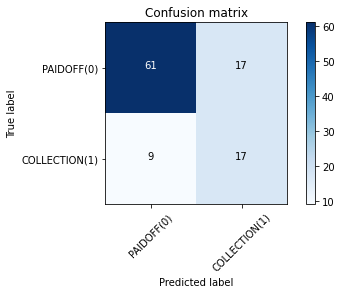

In [50]:
cnf_matrix = confusion_matrix(y_test,dt_yhat, labels=["PAIDOFF","COLLECTION"])
np.set_printoptions(precision=2)

print (classification_report(y_test,dt_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(0)','COLLECTION(1)'],normalize= False,  title='Confusion matrix')

In [51]:
## Evaluation Metrics
# jaccard score and f1 score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_dt_model.predict(x_train),pos_label="PAIDOFF"))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_dt_model.predict(x_test),pos_label="PAIDOFF"))

print("Train set Accuracy (F1): ", f1_score(y_train, best_dt_model.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_dt_model.predict(x_test), average='weighted'))

Train set Accuracy (Jaccard):  0.8663101604278075
Test set Accuracy (Jaccard):  0.7209302325581395
Train set Accuracy (F1):  0.900213386798435
Test set Accuracy (F1):  0.7783783783783783


In [52]:
#

In [53]:
#

In [54]:
#

In [55]:
#importing svm
from sklearn import svm 
from sklearn.metrics import f1_score

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3,stratify=y)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


In [57]:
for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(x_train,y_train)
    svm_yhat = svm_model.predict(x_test)
    print("For Kernel:{},the f1 score is:{}".format(k,f1_score(y_hat,svm_yhat,average="weighted")))

For Kernel:linear,the f1 score is:0.942684766214178
For Kernel:poly,the f1 score is:0.902668759811617
For Kernel:rbf,the f1 score is:0.9378552482000758
For Kernel:sigmoid,the f1 score is:0.9329779131759328


In [58]:
svm_yhat = svm_model.predict(x_test)
svm_yhat[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [60]:
print("We can see the rbf has the best f1 score ")

We can see the rbf has the best f1 score 


In [61]:
## building best SVM with kernel = rbf
best_svm = svm.SVC(kernel='poly').fit(x_train,y_train)
best_svm

SVC(kernel='poly')

In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        26
     PAIDOFF       0.75      0.97      0.84        78

    accuracy                           0.73       104
   macro avg       0.37      0.49      0.42       104
weighted avg       0.56      0.73      0.63       104

Confusion matrix, without normalization
[[76  2]
 [26  0]]


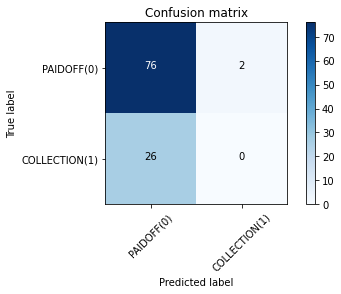

In [63]:
cnf_matrix = confusion_matrix(y_test, svm_yhat, labels=["PAIDOFF","COLLECTION"])
np.set_printoptions(precision=2)

print (classification_report(y_test, svm_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(0)','COLLECTION(1)'],normalize= False,  title='Confusion matrix')

In [64]:
## Evaluation Metrics
# jaccard score and f1 score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_svm.predict(x_train),pos_label="PAIDOFF"))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_svm.predict(x_test),pos_label="PAIDOFF"))

print("Train set Accuracy (F1): ", f1_score(y_train, best_svm.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_svm.predict(x_test), average='weighted'))

Train set Accuracy (Jaccard):  0.7692307692307693
Test set Accuracy (Jaccard):  0.74
Train set Accuracy (F1):  0.7106411375186078
Test set Accuracy (F1):  0.6967545638945233


In [65]:
#

In [66]:
#

In [67]:
#

In [68]:
#Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [71]:
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(x_train, y_train)
    lr_yhat = lr_model.predict(x_test)
    y_prob = lr_model.predict_proba(x_test)
    print('When Solver is {}, logloss is : {}'.format(k, log_loss(y_test, y_prob)))

When Solver is lbfgs, logloss is : 0.4936461043171233
When Solver is saga, logloss is : 0.4936468985557999
When Solver is liblinear, logloss is : 0.5596048169715364
When Solver is newton-cg, logloss is : 0.49364617845109443
When Solver is sag, logloss is : 0.4936452988165569


In [72]:
print("We can see that the best solver is liblinear")

We can see that the best solver is liblinear


In [73]:
best_lr_model=LogisticRegression(C=0.01,solver="liblinear").fit(x_train,y_train)
best_lr_model

LogisticRegression(C=0.01, solver='liblinear')

In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        17
     PAIDOFF       0.76      1.00      0.86        53

    accuracy                           0.76        70
   macro avg       0.38      0.50      0.43        70
weighted avg       0.57      0.76      0.65        70

Confusion matrix, without normalization
[[53  0]
 [17  0]]


C:\Users\ChethanM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ChethanM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ChethanM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


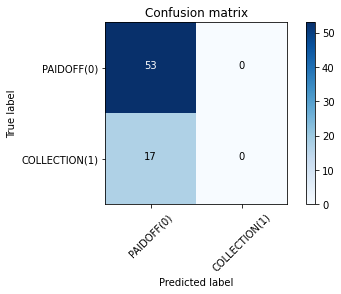

In [75]:
cnf_matrix = confusion_matrix(y_test, lr_yhat, labels=["PAIDOFF","COLLECTION"])
np.set_printoptions(precision=2)

print(classification_report(y_test,lr_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(0)','COLLECTION(1)'],normalize= False,  title='Confusion matrix')

In [76]:
## Evaluation Metrics
# jaccard score and f1 score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_lr_model.predict(x_train),pos_label="PAIDOFF"))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_lr_model.predict(x_test),pos_label="PAIDOFF"))

print("Train set Accuracy (F1): ", f1_score(y_train, best_lr_model.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_lr_model.predict(x_test), average='weighted'))

Train set Accuracy (Jaccard):  0.75
Test set Accuracy (Jaccard):  0.7571428571428571
Train set Accuracy (F1):  0.6428571428571428
Test set Accuracy (F1):  0.6524970963995355


In [77]:
#Model Evaluation using Test set

In [78]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [79]:
test_df=pd.read_csv(r"C:\Users\ChethanM\Desktop\loan_test.csv")

In [80]:
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [81]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)


x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)

y_loan_test = test_df['loan_status'].values

In [82]:
#Jaccard 

In [83]:
#KNN 

knn_yhat=best_knn_model.predict(x_loan_test)
jacc1=jaccard_score(y_loan_test, knn_yhat,pos_label="PAIDOFF")
jacc1=round(jacc1,2)

# Decision Tree
dt_yhat = best_dt_model.predict(x_loan_test)
jacc2 = jaccard_score(y_loan_test, dt_yhat,pos_label="PAIDOFF")
jacc2=round(jacc2,2)

# Support Vector Machine
svm_yhat = best_svm.predict(x_loan_test)
jacc3 = jaccard_score(y_loan_test, svm_yhat,pos_label="PAIDOFF")
jacc3=round(jacc3,2)

# Logistic Regression
lr_yhat = best_lr_model.predict(x_loan_test)
jacc4 = jaccard_score(y_loan_test, lr_yhat,pos_label="PAIDOFF")
jacc4=round(jacc4,2)

jss=[jacc1,jacc2,jacc3,jacc4]
jss

[0.73, 0.68, 0.7, 0.74]

In [84]:
# F1_score

# KNN
knn_yhat = best_knn_model.predict(x_loan_test)
f1 = round(f1_score(y_loan_test, knn_yhat, average = 'weighted'), 2)

# Decision Tree
dt_yhat = best_dt_model.predict(x_loan_test)
f2 = round(f1_score(y_loan_test, dt_yhat, average = 'weighted'), 2)

# Support Vector Machine
svm_yhat = best_svm.predict(x_loan_test)
f3 = round(f1_score(y_loan_test, svm_yhat, average = 'weighted'), 2)

# Logistic Regression
lr_yhat = best_lr_model.predict(x_loan_test)
f4 = round(f1_score(y_loan_test, lr_yhat, average = 'weighted'), 2)

f1_list = [f1, f2, f3, f4]
f1_list

[0.68, 0.69, 0.61, 0.63]

In [85]:
# log loss

# Logistic Regression
lr_prob = best_lr_model.predict_proba(x_loan_test)
ll_list = ['NA','NA',"NA", round(log_loss(y_loan_test, lr_prob), 2)]
ll_list

['NA', 'NA', 'NA', 0.57]

In [86]:
columns = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
index = ['Jaccard', 'F1-score', 'Logloss']

accuracy_df = pd.DataFrame([jss, f1_list, ll_list], index = index, columns = columns)
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,Logloss
KNN,0.73,0.68,NA
Decision Tree,0.68,0.69,NA
SVM,0.7,0.61,NA
Logistic Regression,0.74,0.63,0.57
